<a href="https://colab.research.google.com/github/emilziyaev/sibur2021Challenge/blob/main/ez_%5BSC2021%5D0712.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install CatBoost

In [ ]:
! pip install --upgrade Cython
! pip install --upgrade git+https://github.com/statsmodels/statsmodels
import statsmodels.api as sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%pylab inline
plt.style.use("bmh")

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import pathlib
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_log_error
import numpy as np


In [ ]:
#import statistics.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
# import ml_metrics as metrics

In [ ]:
DATA_DIR = pathlib.Path(".")
DATA_FILE = "/content/drive/MyDrive/Sibur challange 2021/sc2021_train_deals.csv"
AGG_COLS = ["material_code", "company_code", "country", "region", "manager_code", "complexId"]
RS = 82736

# Загрузка данных

In [ ]:
# data = pd.read_csv(DATA_DIR.joinpath(DATA_FILE), parse_dates=["month", "date"])
data = pd.read_csv(DATA_FILE, parse_dates=["month", "date"])

In [ ]:
data.head(3)

,material_code,company_code,country,region,manager_code,month,material_lvl1_name,material_lvl2_name,material_lvl3_name,contract_type,date,volume,complexId
0,134,0,Литва,Литва,12261,2018-01-01,Базовые полимеры,ПЭ,ПЭНП,Спот,2018-01-01,43.0,134012261
1,197,0,Китай,Китай,16350,2018-01-01,Базовые полимеры,ПЭ,ПЭНП,Спот,2018-01-02,95.0,197016350
2,794,2162,Казахстан,Атырауская обл.,10942,2018-01-01,Базовые полимеры,ПП,ПП,Контракт,2018-01-02,57.0,794216210942


In [ ]:
countriesToNumeric = {'Австрия': 16,
 'Белоруссия': 1,
 'Бельгия': 12,
 'Венгрия': 22,
 'Германия': 7,
 'Дания': 24,
 'Индия': 28,
 'Испания': 29,
 'Италия': 23,
 'Казахстан': 2,
 'Киргизия': 3,
 'Китай': 4,
 'Литва': 8,
 'Молдавия': 14,
 'Нидерланды': 17,
 'Польша': 9,
 'Россия': 0,
 'Сербия': 13,
 'Словакия': 15,
 'Соед. Королев.': 10,
 'Таджикистан': 26,
 'Турция': 27,
 'Узбекистан': 5,
 'Украина': 6,
 'Финляндия': 18,
 'Франция': 19,
 'Чехия': 11,
 'Швейцария': 20,
 'Швеция': 25,
 'Эстония': 21}
 
RegionsToNumeric = {'Австрия': 72,
 'Алтайский край': 7,
 'Астраханская обл.': 92,
 'Атырауская обл.': 101,
 'Белгородская обл.': 34,
 'Бельгия': 41,
 'Брестская обл.': 53,
 'Брянская обл.': 61,
 'Венгрия': 80,
 'Витебская обл.': 54,
 'Владимирская обл.': 43,
 'Волгоградская обл.': 52,
 'Вологодская обл.': 62,
 'Воронежская обл.': 35,
 'Восточно-Казахстанская обл.': 45,
 'Германия': 36,
 'Гомельская обл.': 93,
 'Гродненская обл.': 55,
 'Дания': 84,
 'Еврейская АО': 87,
 'Западно-Казахстанская обл.': 56,
 'Ивановская обл.': 100,
 'Индия': 94,
 'Иркутская обл.': 8,
 'Испания': 96,
 'Италия': 81,
 'Казахстан': 77,
 'Калининградская обл.': 63,
 'Калужская обл.': 9,
 'Карагандинская обл.': 57,
 'Кемеровская обл.': 10,
 'Киргизия': 5,
 'Кировская обл.': 82,
 'Китай': 6,
 'Краснодарский край': 29,
 'Красноярский край': 64,
 'Курская обл.': 25,
 'Ленинградская обл.': 26,
 'Липецкая обл.': 44,
 'Литва': 37,
 'Мангистауская обл.': 58,
 'Минская обл.': 1,
 'Могилевская обл.': 2,
 'Молдавия': 60,
 'Московская обл.': 11,
 'Нидерланды': 73,
 'Нижегородская обл.': 33,
 'Новосибирская обл.': 12,
 'Омская обл.': 27,
 'Оренбургская обл.': 65,
 'Орловская обл.': 66,
 'Павлодарская обл.': 59,
 'Пензенская обл.': 48,
 'Пермский край': 30,
 'Польша': 38,
 'Приморский край': 13,
 'Псковская обл.': 67,
 'Респ. Башкортостан': 50,
 'Респ. Дагестан': 88,
 'Респ. Коми': 97,
 'Респ. Марий Эл': 79,
 'Респ. Мордовия': 71,
 'Респ. Саха (Якутия)': 68,
 'Респ. Татарстан': 0,
 'Респ. Удмуртия': 86,
 'Респ. Хакасия': 95,
 'Россия': 91,
 'Ростовская обл.': 14,
 'Рязанская обл.': 32,
 'Самарская обл.': 46,
 'Саратовская обл.': 49,
 'Свердловская обл.': 15,
 'Сербия': 51,
 'Словакия': 70,
 'Смоленская обл.': 22,
 'Соед. Королев.': 39,
 'Ставропольский край': 23,
 'Таджикистан': 89,
 'Тверская обл.': 99,
 'Томская обл.': 16,
 'Тульская обл.': 31,
 'Турция': 90,
 'Тюменская обл.': 17,
 'Узбекистан': 20,
 'Украина': 21,
 'Ульяновская обл.': 83,
 'Финляндия': 74,
 'Франция': 75,
 'Хабаровский край': 18,
 'Ханты-Мансийский а. о.': 98,
 'Челябинская обл.': 24,
 'Чехия': 40,
 'Чувашская респ.': 69,
 'Швейцария': 76,
 'Швеция': 85,
 'Эстония': 78,
 'Ярославская обл.': 47,
 'г. Алма-Ата': 42,
 'г. Минск': 3,
 'г. Москва': 19,
 'г. Нур-Султан': 4,
 'г. Санкт-Петербург': 28}

In [ ]:
data['complexId'] = str(data['material_code']) + str(data['company_code']) + str(data['manager_code'])

In [ ]:
data.iloc[0][0] = 135

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data['complexId'] = data['complexId'].astype(str)

In [ ]:
for i in range(92306):
  data.at[i, 'complexId'] = str(data.loc[i]['material_code']) + str(data.loc[i]['company_code']) + str(data.loc[i]['manager_code']) + str(RegionsToNumeric[data.loc[i]['region']])

In [ ]:
len(data['complexId'].unique())

941

Временной диапазон тренировочного множества:

In [ ]:
data.month.min(), data.month.max()

(Timestamp('2018-01-01 00:00:00'), Timestamp('2020-07-01 00:00:00'))

# Временные ряды

In [ ]:
# исходная группировка (базовая)
group_ts = data.groupby(AGG_COLS + ["month"])["volume"].sum().unstack(fill_value=0)
group_ts=group_ts.loc[:,:'2020-06-01']
group_ts.head(3)

month                                                                              2018-01-01  ...  2020-06-01
material_code company_code country    region           manager_code complexId                  ...            
124           7278         Россия     Респ. Татарстан  17460        1247278174600       340.0  ...         0.0
133           0            Белоруссия Минская обл.     10942        1330109421            0.0  ...       210.0
                                      Могилевская обл. 10942        1330109422            0.0  ...         0.0

[3 rows x 30 columns]

In [ ]:
group_ts.index[0][5]

'1247278174600'

In [ ]:
for i in range (941):
  otg=group_ts.iloc[i]
  group_ts.iloc[i].

In [ ]:
group_ts.reset_index['material_code']

TypeError: ignored

In [ ]:
#complexId для данных с нулями и без 
noNulls=[]
nullsInit=[]


top_not_zero=[]
other=[]

for i in range (941):
  otg=group_ts.iloc[i]
  if (otg==0).sum()==0:
    top_not_zero.append(i)
    noNulls.append(group_ts.index[i][5])
  else:
    other.append(i)
    nullsInit.append(group_ts.index[i][5])

In [ ]:
len(noNulls), len(nullsInit)

(94, 847)

In [ ]:
group_ts.iloc[936]

In [ ]:
# проверка данных на обучении
group_ts=group_ts.iloc[top_not_zero]

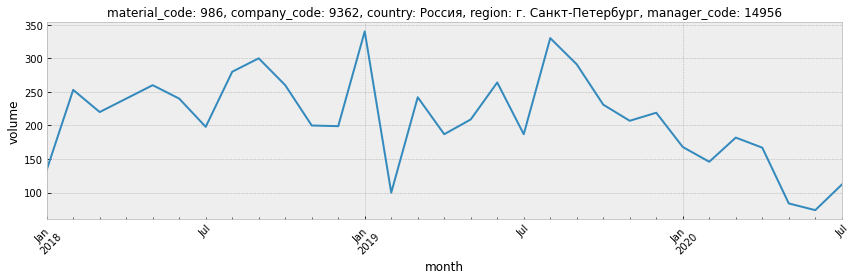

In [ ]:
ROW_ID = -7

plt.figure(figsize=(12,4))
group_ts.iloc[ROW_ID].plot(rot=45)

title = ', '.join([f"{k}: {v}" for k, v in zip(AGG_COLS, group_ts.index[ROW_ID])])
plt.title(title, fontsize=12)
plt.ylabel("volume")

plt.tight_layout()

# Baseline #1: последнее известное значение

In [ ]:
tr_data = group_ts.iloc[:, :-6]
val_data = group_ts.iloc[:, -6:]

In [ ]:
val_data

month                                                                  2020-02-01  ...  2020-07-01
material_code company_code country    region             manager_code              ...            
124           7278         Россия     Респ. Татарстан    17460                0.0  ...         0.0
133           0            Белоруссия Минская обл.       10942               72.0  ...       249.0
                                      Могилевская обл.   10942                0.0  ...         0.0
                                      г. Минск           10942                0.0  ...         6.0
                           Казахстан  г. Нур-Султан      13301               50.0  ...         0.0
...                                                                           ...  ...         ...
986           9943         Россия     Смоленская обл.    17460               21.0  ...        83.0
998           0            Россия     Ленинградская обл. 18079                5.0  ...         9.0
              3380         Россия     Ленинградская обл. 14956               74.0  ...        50.0
              5410         Россия     г. Санкт-Петербург 14956              180.0  ...         0.0
              6346         Россия     Респ. Башкортостан 10737                0.0  ...        21.0

[941 rows x 6 columns]

In [ ]:
predictions = val_data.copy()
predictions.iloc[:, :] = np.nan
predictions.iloc[:, 0] = tr_data.iloc[:, -1]

In [ ]:
predictions.ffill(axis=1, inplace=True)

In [ ]:
predictions

month                                                                  2020-02-01  ...  2020-07-01
material_code company_code country    region             manager_code              ...            
124           7278         Россия     Респ. Татарстан    17460                0.0  ...         0.0
133           0            Белоруссия Минская обл.       10942               17.0  ...        17.0
                                      Могилевская обл.   10942                0.0  ...         0.0
                                      г. Минск           10942                0.0  ...         0.0
                           Казахстан  г. Нур-Султан      13301                0.0  ...         0.0
...                                                                           ...  ...         ...
986           9943         Россия     Смоленская обл.    17460                0.0  ...         0.0
998           0            Россия     Ленинградская обл. 18079                5.0  ...         5.0
              3380         Россия     Ленинградская обл. 14956               73.0  ...        73.0
              5410         Россия     г. Санкт-Петербург 14956              100.0  ...       100.0
              6346         Россия     Респ. Башкортостан 10737               40.0  ...        40.0

[941 rows x 6 columns]

In [ ]:
print("Ошибка на валидационном множестве:", f"{np.sqrt(mean_squared_log_error(val_data, predictions)):.4f}")

Ошибка на валидационном множестве: 2.3817


# Baseline #2: среднее за последние три месяца

In [ ]:
predictions = val_data.copy()
predictions.iloc[:, :] = np.nan
predictions.iloc[:, 0] = tr_data.iloc[:, -3:].mean(axis=1)

In [ ]:
predictions.ffill(axis=1, inplace=True)

In [ ]:
predictions

month                                                                  2020-02-01  ...  2020-07-01
material_code company_code country    region             manager_code              ...            
124           7278         Россия     Респ. Татарстан    17460           0.000000  ...    0.000000
133           0            Белоруссия Минская обл.       10942         144.000000  ...  144.000000
                                      Могилевская обл.   10942           0.000000  ...    0.000000
                                      г. Минск           10942          14.000000  ...   14.000000
                           Казахстан  г. Нур-Султан      13301          31.666667  ...   31.666667
...                                                                           ...  ...         ...
986           9943         Россия     Смоленская обл.    17460           0.000000  ...    0.000000
998           0            Россия     Ленинградская обл. 18079           3.666667  ...    3.666667
              3380         Россия     Ленинградская обл. 14956          68.000000  ...   68.000000
              5410         Россия     г. Санкт-Петербург 14956         113.333333  ...  113.333333
              6346         Россия     Респ. Башкортостан 10737          40.000000  ...   40.000000

[941 rows x 6 columns]

In [ ]:
print("Ошибка на валидационном множестве:", f"{np.sqrt(mean_squared_log_error(val_data, predictions)):.4f}")

Ошибка на валидационном множестве: 2.2008


# Baseline #3: CatBoostRegressor

Признаки:

- оригинальные категориальные признаки,
- месяц, для которого предсказываем,
- среднее, минимум и максимум за год,
- последние 6 месяцев до месяца, для которого предсказываем.

Для тренировки будем использовать период `2019-01-01` по `2019-06-01`, для валидации: с `2019-07-01` по `2019-12-01`, для тестирования: с `2020-01-01` по `2020-07-01`.

In [ ]:
def get_features(df: pd.DataFrame, month: pd.Timestamp) -> pd.DataFrame:
    """Calculate features for `month`."""

       
    start_period = month - pd.offsets.MonthBegin(6)
    end_period = month - pd.offsets.MonthBegin(1)
  
          
    df = df.loc[:, :end_period]

    features = pd.DataFrame([], index=df.index)
    features["month"] = month.month
    features[[f"vol_tm{i}" for i in range(6, 0, -1)]] = df.loc[:, start_period:end_period].copy()
   
    
    rolling_12 = df.rolling(12, axis=1, min_periods=1)
    rolling_6 = df.rolling(6, axis=1, min_periods=1)
    rolling_6s = df.rolling(6, axis=1, min_periods=1,win_type='gaussian')
    

    features = features.join(rolling_12.mean().iloc[:, -1].rename("last_year_avg_12"))
    features = features.join(rolling_12.min().iloc[:, -1].rename("last_year_min_12"))
    features = features.join(rolling_12.max().iloc[:, -1].rename("last_year_max_12"))
    features = features.join(rolling_12.sum().iloc[:, -1].rename("sum_12"))
    features = features.join(rolling_12.std().iloc[:, -1].rename("std_12"))
    features = features.join(rolling_6.mean().iloc[:, -1].rename("last_year_avg_6"))
    features = features.join(rolling_6.min().iloc[:, -1].rename("last_year_min_6"))
    features = features.join(rolling_6.max().iloc[:, -1].rename("last_year_max_6"))
    features = features.join(rolling_6s.sum(std=3).iloc[:, -1].rename("sum_6"))
    features = features.join(rolling_6.sum().iloc[:, -1].rename("sum_6_"))
    features = features.join(rolling_6.std().iloc[:, -1].rename("std_6"))
    features['zeros'] = (df==0).sum(axis=1)

    
    return features

In [ ]:
tr_range = pd.date_range("2019-01-01", "2020-05-01", freq="MS")
#val_range = pd.date_range("2019-07-01", "2019-12-01", freq="MS")
ts_range = pd.date_range("2020-06-01", "2020-07-01", freq="MS")

In [ ]:
full_features = {}

for dataset, dataset_range in zip(["tr", "ts"], [tr_range, ts_range]):
    dataset_features = []
    for target_month in dataset_range:
        features = get_features(group_ts, target_month)
        features["target"] = group_ts[target_month]
        dataset_features.append(features.reset_index())
    full_features[dataset] = pd.concat(dataset_features, ignore_index=True)

## Тренировка

In [ ]:
CAT_COLS = ["material_code", "company_code", "country", "region", "manager_code", "month"]
FTS_COLS = ["material_code", "company_code", "country", "region", "manager_code", "month",
             "vol_tm3", "vol_tm2", "vol_tm1",'sum_6_',
            "last_year_avg_12", "last_year_min_12", "last_year_max_12","sum_12",'zeros','sum_6']
            #"last_year_avg_6", "last_year_min_6", "last_year_max_6",'sum_6','std_6','std_12',  "vol_tm6", "vol_tm5", "vol_tm4",
            # ,            "vol_tm7", "vol_tm8", "vol_tm9"
TARGET = "target"

In [ ]:
model = CatBoostRegressor(iterations=1000,
                          early_stopping_rounds=30,
                          depth=7,
                          learning_rate=0.02,
                          cat_features=CAT_COLS,
                          random_state=RS,
                          verbose=10)
model.fit(full_features["tr"][FTS_COLS], full_features["tr"][TARGET])
#, eval_set=(full_features["val"][FTS_COLS], full_features["val"][TARGET])

0:	learn: 315.2050073	total: 87ms	remaining: 1m 26s
10:	learn: 279.8939067	total: 354ms	remaining: 31.8s
20:	learn: 252.5413234	total: 635ms	remaining: 29.6s
30:	learn: 230.6914437	total: 928ms	remaining: 29s
40:	learn: 213.8664053	total: 1.18s	remaining: 27.7s
50:	learn: 200.8325385	total: 1.44s	remaining: 26.9s
60:	learn: 190.6537779	total: 1.7s	remaining: 26.1s
70:	learn: 182.9307056	total: 1.97s	remaining: 25.8s
80:	learn: 177.1151131	total: 2.22s	remaining: 25.2s
90:	learn: 172.2789671	total: 2.45s	remaining: 24.5s
100:	learn: 168.0832528	total: 2.71s	remaining: 24.1s
110:	learn: 164.7038969	total: 2.96s	remaining: 23.7s
120:	learn: 162.0930468	total: 3.22s	remaining: 23.4s
130:	learn: 159.7092093	total: 3.46s	remaining: 22.9s
140:	learn: 157.8777970	total: 3.7s	remaining: 22.5s
150:	learn: 156.3569740	total: 3.95s	remaining: 22.2s
160:	learn: 154.8690618	total: 4.21s	remaining: 21.9s
170:	learn: 153.4771448	total: 4.45s	remaining: 21.6s
180:	learn: 152.3793934	total: 4.71s	remain

In [ ]:
pd.Series(model.feature_importances_, index=FTS_COLS).sort_values(ascending=False)

vol_tm1             29.020200
last_year_max_12    10.696730
vol_tm2             10.154861
vol_tm3             10.061976
zeros                5.929280
manager_code         5.405642
sum_6_               4.367296
month                4.330931
material_code        3.399210
sum_6                3.121727
sum_12               3.071005
last_year_avg_12     2.789476
country              2.753926
last_year_min_12     2.101824
company_code         1.967774
region               0.828142
dtype: float64

In [ ]:
tr_preds = abs(model.predict(full_features["tr"][FTS_COLS]))
#val_preds = abs(model.predict(full_features["val"][FTS_COLS]))
ts_preds = abs(model.predict(full_features["ts"][FTS_COLS]))

In [ ]:
print("Ошибка на тренировочном множестве:",
      f'{np.sqrt(mean_squared_log_error(full_features["tr"][TARGET], tr_preds)):.4f}')
#print("Ошибка на валидационном множестве:",
#      f'{np.sqrt(mean_squared_log_error(full_features["val"][TARGET], val_preds)):.4f}')
print("Ошибка на тестовом множестве:",
      f'{np.sqrt(mean_squared_log_error(full_features["ts"][TARGET], ts_preds)):.4f}')

Ошибка на тренировочном множестве: 1.9976
Ошибка на тестовом множестве: 2.2148


# Формирование загрузки

In [ ]:
model.save_model("baseline_model.cbm")

In [ ]:
%%writefile predict.py

import pathlib
import pandas as pd
from catboost import CatBoostRegressor

MODEL_FILE = pathlib.Path(__file__).parent.joinpath("baseline_model.cbm")
AGG_COLS = ["material_code", "company_code", "country", "region", "manager_code"]

def get_features(df: pd.DataFrame, month: pd.Timestamp) -> pd.DataFrame:
    """Вычисление признаков для `month`."""

    start_period = month - pd.offsets.MonthBegin(6)
    end_period = month - pd.offsets.MonthBegin(1)

    df = df.loc[:, :end_period]

    features = pd.DataFrame([], index=df.index)
    features["month"] = month.month
    features[[f"vol_tm{i}" for i in range(6, 0, -1)]] = df.loc[:, start_period:end_period].copy()

    rolling_12 = df.rolling(12, axis=1, min_periods=1)
    rolling_6 = df.rolling(6, axis=1, min_periods=3)
    
    features = features.join(rolling_12.mean().iloc[:, -1].rename("last_year_avg_12"))
    features = features.join(rolling_12.min().iloc[:, -1].rename("last_year_min_12"))
    features = features.join(rolling_12.max().iloc[:, -1].rename("last_year_max_12"))
    features = features.join(rolling_12.sum().iloc[:, -1].rename("sum_12"))
    features = features.join(rolling_12.std().iloc[:, -1].rename("std_12"))
    
    features = features.join(rolling_6.mean().iloc[:, -1].rename("last_year_avg_6"))
    features = features.join(rolling_6.min().iloc[:, -1].rename("last_year_min_6"))
    features = features.join(rolling_6.max().iloc[:, -1].rename("last_year_max_6"))
    features = features.join(rolling_6.sum().iloc[:, -1].rename("sum_6"))
    features = features.join(rolling_6.std().iloc[:, -1].rename("std_6"))
    
    features["month"] = month.month
    return features.reset_index()


def predict(df: pd.DataFrame, month: pd.Timestamp) -> pd.DataFrame:
    """
    Вычисление предсказаний.

    Параметры:
        df:
          датафрейм, содержащий все сделки с начала тренировочного периода до `month`; типы
          колонок совпадают с типами в ноутбуке `[SC2021] Baseline`,
        month:
          месяц, для которого вычисляются предсказания.

    Результат:
        Датафрейм предсказаний для каждой группы, содержащий колонки:
            - `material_code`, `company_code`, `country`, `region`, `manager_code`,
            - `prediction`.
        Предсказанные значения находятся в колонке `prediction`.
    """

    group_ts = df.groupby(AGG_COLS + ["month"])["volume"].sum().unstack(fill_value=0)
    features = get_features(group_ts, month)

    model = CatBoostRegressor()
    model.load_model(MODEL_FILE)
    predictions = abs(model.predict(features[model.feature_names_]))

    preds_df = features[AGG_COLS].copy()
    preds_df["prediction"] = predictions
    return preds_df
    

Writing predict.py


Протестируем:

In [ ]:
import predict

In [ ]:
predict.get_features(group_ts.iloc[:, :-1], pd.Timestamp("2020-07-01"))

,material_code,company_code,country,region,manager_code,month,vol_tm6,vol_tm5,vol_tm4,vol_tm3,vol_tm2,vol_tm1,last_year_avg,last_year_min,last_year_max
0,124,7278,Россия,Респ. Татарстан,17460,7,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,133,0,Белоруссия,Минская обл.,10942,7,17.0,72.0,250.0,394.0,288.0,210.0,179.833333,17.0,394.0
2,133,0,Белоруссия,Могилевская обл.,10942,7,0.0,0.0,0.0,166.0,62.0,0.0,19.000000,0.0,166.0
3,133,0,Белоруссия,г. Минск,10942,7,0.0,0.0,0.0,21.0,0.0,0.0,22.416667,0.0,83.0
4,133,0,Казахстан,г. Нур-Султан,13301,7,0.0,50.0,40.0,0.0,0.0,50.0,30.000000,0.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,986,9943,Россия,Смоленская обл.,17460,7,0.0,21.0,63.0,125.0,84.0,84.0,31.416667,0.0,125.0
937,998,0,Россия,Ленинградская обл.,18079,7,5.0,5.0,5.0,0.0,3.0,3.0,4.750000,0.0,10.0
938,998,3380,Россия,Ленинградская обл.,14956,7,73.0,74.0,122.0,100.0,15.0,30.0,85.583333,15.0,129.0
939,998,5410,Россия,г. Санкт-Петербург,14956,7,100.0,180.0,180.0,100.0,140.0,40.0,118.333333,40.0,180.0


In [ ]:
predict.predict(data[data.month<"2020-07-01"], pd.Timestamp("2020-07-01"))

In [ ]:
#для двух моделей



In [ ]:
!zip -r baseline_submission.zip baseline_model.cbm predict.py

updating: baseline_model.cbm (deflated 72%)
updating: predict.py (deflated 57%)


In [ ]:
!ls -lh

In [ ]:
sand=pd.read_excel('sand.xlsx')

In [ ]:
flag=sand['Сведения о сертификации']!=sand['Сведения о сертификации']
sand[flag]


,№ п/п _ 465,Наименование оборудования,Требуемый параметр,Требуемое значение,Единица измерения,Соответствие КТРУ,Примечение,Наименование СПГЗ,Код КПГЗ,Сведения о сертификации,Обоснование позиции,Обоснование требований,Соответствие 44-ФЗ / 223-ФЗ (наличие не менее 3-х аналогов / эквивалентов),№ Раздела _ 465,Наименование раздела _ 465,Подраздел _ 465,Наименование подраздела _ 465,Тип оборудования _ 465,Основное / Вариативное _ 465,Наличие в кабинете
0,2.7.,Сетевой фильтр,Количество,NaN,шт.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Комплекс оснащения предметных кабинетов,18,Кабинет астрономии,Технические средства,Основное оборудование,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sand.isnull().sum()

№ п/п _ 465                                                                   271
Наименование оборудования                                                     271
Требуемый параметр                                                            118
Требуемое значение                                                            126
Единица измерения                                                             173
Соответствие КТРУ                                                             125
Примечение                                                                    187
Наименование СПГЗ                                                             274
Код КПГЗ                                                                      274
Сведения о сертификации                                                       276
Обоснование позиции                                                           274
Обоснование требований                                                        276
Соответствие 44-